# Importamos las librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Subimos el data set



In [2]:
df=pd.read_csv("titanic_train.csv")

Mostramos información del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Estadísticas

## Media, mediana, moda

In [ ]:
# Mostramos qué valores hay en el campo Age y cuántas veces aparece cada dato
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
# Media de las edades de los pasajeros
# No consta la edad para todos los pasajeros, aquellos campos a null se ignoran

import statistics as st

print(st.mean(df["Age"].dropna()))

29.699117647058824


In [ ]:
# Mediana
print(st.median(df["Age"].dropna()))

28.0

In [ ]:
# Moda
print(st.mode(df["Age"].dropna()))

24.0


## Desviación estándar y varianza
A veces nos interesa saber cómo son de diferentes los valores entre si. Uno de los enfoques más utilizados es coger la media de un conjunto de datos y comparar todos los datos con dicha media.

En muchos casos no tiene sentido coger una media y no acompañarla de una medida de dispersión apropiada como la **desviación estándar o desviación media**:

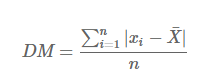

In [ ]:
np.std(df["Age"].dropna())

14.516321150817316

En vez de tomar el valor absoluto se pueden elevar los desvíos al cuadrado, con lo que tendremos la **varianza**:

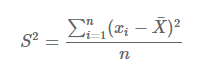



In [ ]:
np.var(df["Age"].dropna())

210.72357975366617

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Representación gráfica
Vamos a usar matplotlib, que es un paquete que entre otros contiene dos módules principales: pyplot y pylab. El primero es el que hemos importado al principio de la práctica.

pyplot permite crear gráficos fácilmente.

## Histogramas
Representan el número de veces que los valores del conjunto caen dentro de un intervalo dado

Vamos a dibujar un gráfico para visualizar la distribución por edades de los pasajeros del Titanic


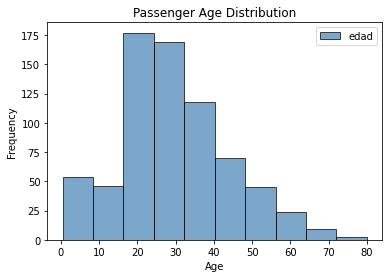

In [ ]:

plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
 
# Eliminar muestras sin datos de edad, sería necesario si hubiese algún campo no informado
df.dropna(subset=['Age'], inplace=True)
 
# Los histogramas son herramientas de visualización que representan la distribución de un conjunto de datos
# Los datos se dividen en un conjunto de intervalos o bins
# y el recuento de puntos de datos que caen en cada bin es la algura de la barra sobre ese bin
plt.hist (df.Age,                 # Datos
             bins = 10,           # 10 columnas
             color = 'steelblue', # Color de relleno
             edgecolor = 'k',     # Color del borde
             label = 'edad',      # Etiqueta
             alpha = 0.7)         # Transparencia
 
plt.legend()

## subplots
La función matplotlib.pyplot.subplots crea una figura y uno (o varios) conjunto de ejes, devolviendo una referencia a la figura y a los ejes.

Ahora vamos a estudiar su tasa de supervivencia dependiendo del sexo


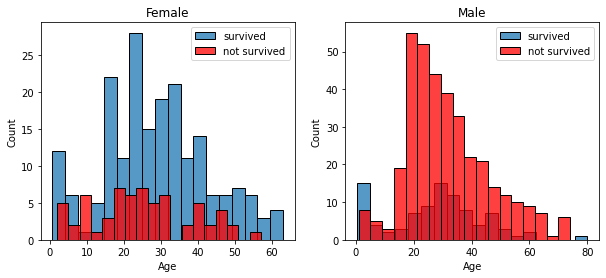

In [ ]:
import seaborn as sns
 
survived = 'survived'
not_survived = 'not survived'
 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
 
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = ax1, kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = ax1, kde =False, color='red')
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = ax2, kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = ax2, kde = False, color='red')
ax.legend()
ax.set_title('Male')
plt.show()

## bar char
Vamos a ver la supervivencia por clase

In [ ]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

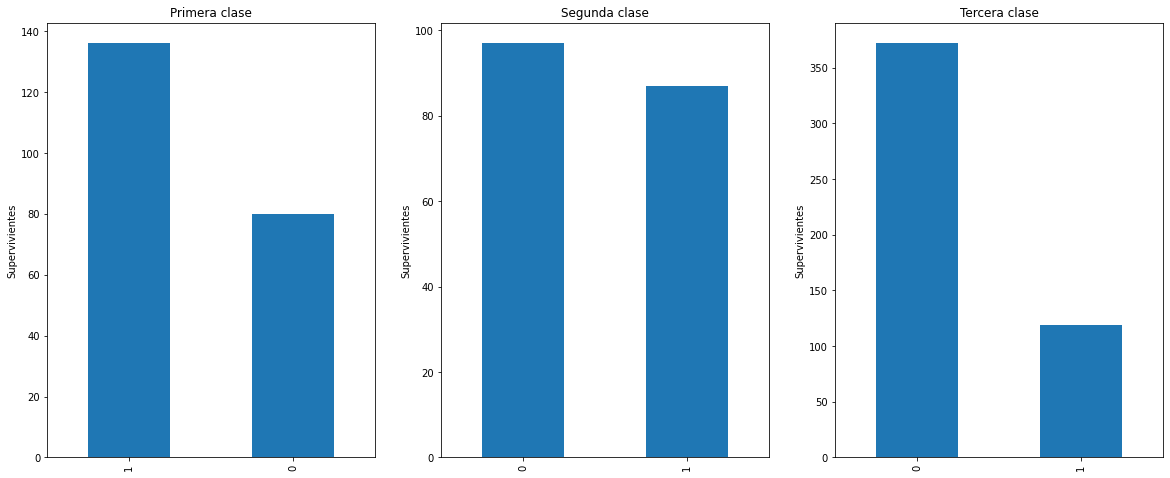

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
 
df[df['Pclass']==1].Survived.value_counts().plot(ax=ax1, kind='bar',stacked=False, title='Primera clase', ylabel='Supervivientes')
df[df['Pclass']==2].Survived.value_counts().plot(ax=ax2, kind='bar',stacked=False, title='Segunda clase', ylabel='Supervivientes')
df[df['Pclass']==3].Survived.value_counts().plot(ax=ax3, kind='bar',stacked=False, title='Tercera clase', ylabel='Supervivientes')

plt.show()

## Ejemplo de diagrama de caja
Un diagrama de caja es una representación de una variable cuantitativa o categórica con el propósito de identificar rápidamente los cuartiles del conjunto de datos.

Las barras de los extremos indican el mínimo (barra inferior) y el máximo (barra superior). Los datos atípicos estarían representados fuera del intervalo del máximo y el mínimo. 

La parte inferior de la caja es el primer cuartil, la barra del medio de la caja es la mediana o segundo cuartil, la parte superior de la caja es el tercer cuartil.

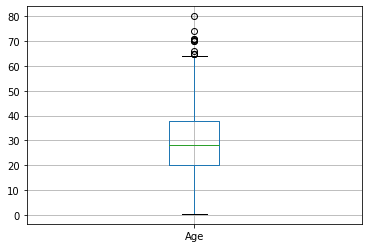

In [ ]:
boxplot = df.boxplot(column=['Age'])
boxplot.plot()

plt.show()


## Gráfica de dispersión

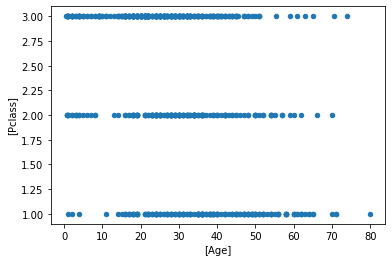

In [ ]:
scatter_plot=df.plot.scatter(x=['Age'],y=['Pclass'])
scatter_plot.plot()
plt.show()